# "We rate dogs" data wrangling project

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: [```twitter_archive_enhanced.csv```](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)

1. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (```image_predictions.tsv```) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

1. Each tweet's *retweet count* and *favorite ("like") count* at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's [Tweepy](http://www.tweepy.org/) library and store each tweet's entire set of JSON data in a file called ```tweet_json.txt``` file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

Note: do not include your Twitter API keys, secrets, and tokens in your project submission.


## Assessing Data for this Project

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least **eight (8) quality issues** and **two (2) tidiness issues** in your ```wrangle_act.ipynb``` Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

## Cleaning Data for this Project

Clean each of the issues you documented while assessing. Perform this cleaning in ```wrangle_act.ipynb``` as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

## Storing, Analyzing, and Visualizing Data for this Project

Store the clean DataFrame(s) in a CSV file with the main one named ```twitter_archive_master.csv```. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your ```wrangle_act.ipynb``` Jupyter Notebook. **At least three (3) insights and one (1) visualization** must be produced.

## Reporting for this Project

Create **a 300-600 word written report** called ```mwrangle_report.pdf``` or ```wrangle_report.html``` that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a **250-word-minimum written report** called ```act_report.pdf``` or ```act_report.html``` that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Both of these documents can be created in separate Jupyter Notebooks using the [Markdown functionality](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) of Jupyter Notebooks, then downloading those notebooks as PDF files or HTML files (see image below). You might prefer to use a word processor like Google Docs or Microsoft Word, however.


In [1]:
import os
import tweepy
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Gather Data

> #### From Template:  
> * Depending on the source of your data, and what format it's in, the steps in gathering data vary.  
> * High-level gathering process: obtaining data (downloading a file from the internet, scraping a web page,  
>   querying an API, etc.) and importing that data into your programming environment (e.g., Jupyter Notebook).  


Data for this projects originates from 3 sources:
1. A `twitter-archive-enhanced.csv` file, provided by Udacity
1. A `image-predictions.tsv` file, also provided by udacity, but downloaded with python `requests` function.
1. A `tweet_coverage.csv` file, created for this project with a twitter API.

In [2]:
def get_image_predictions():
    """Load image-predictions from disk if present, else load it from udacity.
    
    WARNING: This only works from within the udacity project workspace!
    
    """
    
    if  not os.path.exists('image-predictions.tsv'):
        r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv",
                         stream=True)
        tsv = r.raw.read()
        with open('image-predictions.tsv', 'wb') as f:
            f.write(tsv)
            
    df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
    
    return df_image_predictions

In [3]:
def get_tweet_coverate():
    """Load tweet_coverage from disk if present, else scrape it from twitter."""
    
    if  os.path.exists('tweet_coverage.csv'):
        df_tweet_coverage = pd.read_csv('tweet_coverage.csv')
    else:
        consumer_key = os.environ.get("TWITTER_API")
        consumer_secret = os.environ.get("TWITTER_API_SECRET")
        access_token = os.environ.get("TWITTER_ACCESS_TOKEN")
        access_secret = os.environ.get("TWITTER_ACCESS_TOKEN_SECRET")

        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, access_secret)

        api = tweepy.API(auth)
        retweet_count = []
        favorite_count = []
        favorited = []
        retweeted = []

        for index, row in df_twitter_archive.iterrows():
            try:
                tweet_status = api.get_status(row.tweet_id, tweet_mode='extended')._json
                retweet_count.append(tweet_status['retweet_count'])
                favorite_count.append(tweet_status['favorite_count'])
                favorited.append(tweet_status['favorited'])
                retweeted.append(tweet_status['retweeted'])
            except:
                retweet_count.append(np.nan)
                favorite_count.append(np.nan)
                favorited.append(np.nan)
                retweeted.append(np.nan)

            if index % 100 == 0:
                print('Index is %d' % (index))
        print('ready')
        df_tweet_coverage = pd.DataFrame(data = list(zip(df_image_predictions['tweet_id'].values, retweet_count,
                                                         favorite_count, favorited, retweeted)),
                                         columns=['tweet_id', 'retweet_count', 
                                                  'favorite_count', 'favorited', 'retweeted'])
        df_tweet_coverage.to_csv('tweet_coverage.csv', index=False)        
        
    return df_tweet_coverage

In [4]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_image_predictions = get_image_predictions()
df_tweet_coverage = get_tweet_coverate()

## Asses Data

> #### From Template:
> * Assess data for:
>   * Quality: issues with content. Low quality data is also known as dirty data.
>   * Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data.
>     Tidy data requirements:
>       1. Each variable forms a column.
>       1. Each observation forms a row.
>       1. Each type of observational unit forms a table.
> 
> * Types of assessment:
>   * Visual assessment: scrolling through the data in your preferred software application (Google Sheets, Excel,
>     a text editor, etc.).
>   * Programmatic assessment: using code to view specific portions and summaries of the data (pandas' `head`, `tail`,
>     and `info` methods, for example).



In [5]:
df_twitter_archive.head(6)
#df_twitter_archive.sample(10)
#df_twitter_archive.expanded_urls[6]
#df_twitter_archive.info()
#df_twitter_archive[df_twitter_archive.expanded_urls.isna()]
#df_twitter_archive.doggo[0]
#df_twitter_archive.loc[0, 'doggo'] = None
#df_twitter_archive.name.astype('category')
#df_twitter_archive['name']
#df_twitter_archive.loc[22, 'text']
#df_twitter_archive.puppo.unique()
#df_twitter_archive.loc[8, 'expanded_urls']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None


In [6]:
df_image_predictions.head(7)
#df_image_predictions.sample(10)
#df_image_predictions.info()
#df_image_predictions.p1.unique()
df_image_predictions.loc[17]

tweet_id                                 666104133288665088
jpg_url     https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
img_num                                                   1
p1                                                      hen
p1_conf                                            0.965932
p1_dog                                                False
p2                                                     cock
p2_conf                                           0.0339194
p2_dog                                                False
p3                                                partridge
p3_conf                                         5.20658e-05
p3_dog                                                False
Name: 17, dtype: object

In [7]:
df_tweet_coverage.head()
df_tweet_coverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id          2075 non-null int64
retweet_count     879 non-null float64
favorite_count    879 non-null float64
favorited         879 non-null object
retweeted         879 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 81.1+ KB


### Issues found in the files present:

#### Quality

1. In `df_twitter_archive` the **None** values in the columns `doggo`, `floofer`, `pupper` and `puppo` are strings.
1. In `df_twitter_archive` the name column always containts the word after "This is ...", which is not always the dogs name.
1. In `df_twitter_archive` the `retweeted_status_id` is float.
1. In `df_twitter_archive` the `retweeted_status_user_id` is float.
1. In `df_twitter_archive` the `timestamp`  column is of type object.
1. In `df_image_predictions` not all predicted dog breeds are actually dog breeds.
1. In `df_image_predictions` tweed id 762316489655476224 actaully is a dog, not a parrot (african grey).
1. In `df_tweet_coverage` retweet_count and facorite_count are float.
1. In `df_tweet_coverage` favorited and retweeted are objects.


#### Tidiness

1. In `df_twitter_archive` the columns doggo, floofer, pupper and puppo always contain "None" or the column name.
1. In `df_twitter_archive` the overall rating is not present, only nominator and denominator.
1. Data is spread arount three data frames (tables).

## Clean Data

> #### From Template:
> * Types of cleaning:
>   * Manual (not recommended unless the issues are single occurrences)
>   * Programmatic
> * The programmatic data cleaning process:
>   1. Define: convert our assessments into defined cleaning tasks. These definitions also serve as an instruction
>      list so others (or yourself in the future) can look at your work and reproduce it.
>   1. Code: convert those definitions to code and run that code.
>   1. Test: test your dataset, visually or with code, to make sure your cleaning operations worked.
> * Always make copies of the original pieces of data before cleaning!

### Define

#### Quality

1. In `df_twitter_archive` the **None** values in the columns `doggo`, `floofer`, `pupper` and `puppo` are strings.
   
   **Solution:** Change the column type to Boolean, this will also enhance the tidiness. Since according to
   [Dogtionary](https://video.udacity-data.com/topher/2017/October/59e04ceb_dogtionary-combined/dogtionary-combined.png)
   dogs can be "doggo" and "pupper" at the same time, the columns will not be merged to one categoracal column.
   
1. In `df_twitter_archive` the name column always containts the word after "This is ...", which is not always the dogs name.

   **Solution:** This can only be dealt with manually. Since the dog's name column containts faulty data I will erase it.
   
1. In `df_twitter_archive` the `retweeted_status_id` is float.

   **Solution:** Convert `retweeted_status_id`  column to int64 and set NaN to 0.
 
1. In `df_twitter_archive` the `retweeted_status_user_id` is float.

   **Solution:** Convert `retweeted_status_user_id` column to int64 and set NaN to 0.
   
1. In `df_twitter_archive` the `timestamp` column is of type object.

   **Solution:** Convert `timestamp`  column to datetime.
   
1. In `df_image_predictions` not all predicted dog breeds are actually dog breeds.

   **Solution:** Erase all rows, that do not contain pictures of dogs (p123_dog == False), with a confidence `p123_conf` of more than 90%.
   
1. In `df_tweet_coverage` retweet_count and favorite_count are float.

   **Solution:** convert retweet_count and favorite_count to `int64`.
   
1. In `df_tweet_coverage` favorited and retweeted are objects.

   **Solution:** cast favorited and retweeted to `Bool`. 


#### Tidiness

1. In `df_twitter_archive` the columns doggo, floofer, pupper and puppo always contain "None" or the column name.

   **Solution:** Already taken care of in Quality section (cast to `Boolean`).
1. In `df_twitter_archive` the overall rating is not present, only numerator and denominator.

   **Solution:** Calcuate an overall rating and normalize it to a value between 0 and 1. If the denominator is 0, use 10.
   Drop the numerator and denominator columns afterwards.

1. Data is spread arount three data frames (tables).

   **Solution:** Outer join all data frames with common tweet_id, reassess afterwards.


### Code

In [8]:
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_coverage_clean = df_tweet_coverage.copy()

In [9]:
# In df_twitter_archive the None values in the columns doggo, floofer, pupper and puppo are strings.
df_twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] =\
    df_twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'

In [10]:
# In df_twitter_archive the name column always containts the word after "This is ...", which is not always the dogs name.
df_twitter_archive_clean.drop(columns=['name'], inplace=True)

In [11]:
# In df_twitter_archive the retweeted_status_id is float.
df_twitter_archive_clean.loc[df_twitter_archive_clean.retweeted_status_id.isna(), 'retweeted_status_id'] = 0.0
df_twitter_archive_clean.retweeted_status_id = df_twitter_archive_clean.retweeted_status_id.astype('int64')

In [12]:
# In df_twitter_archive the retweeted_status_user_id is float.
df_twitter_archive_clean.loc[df_twitter_archive_clean.retweeted_status_user_id.isna(), 'retweeted_status_user_id'] = 0.0
df_twitter_archive_clean.retweeted_status_user_id = df_twitter_archive_clean.retweeted_status_user_id.astype('int64')

In [13]:
# In df_twitter_archive the timestamp column is of type object.
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean.timestamp)

In [14]:
# In df_image_predictions not all predicted dog breeds are actually dog breeds
none_dog_index = ((df_image_predictions_clean.p1_dog == False) & 
                  (df_image_predictions_clean.p2_dog == False) & 
                  (df_image_predictions_clean.p3_dog == False))
highest_confidence = df_image_predictions_clean[['p1_conf', 'p2_conf', 'p3_conf']].max(axis=1)
not_a_dog = none_dog_index & highest_confidence > 0.5

df_image_predictions_clean.drop(df_image_predictions_clean[not_a_dog].index,
                                inplace=True)

In [15]:
# In df_tweet_coverage retweet_count and favorite_count are float.
df_tweet_coverage.loc[df_tweet_coverage.retweet_count.isna(), 'retweet_count'] = 0.0
df_tweet_coverage.retweet_count = df_tweet_coverage.retweet_count.astype('int64')

In [16]:
# In df_tweet_coverage retweet_count and favorite_count are float.
df_tweet_coverage.loc[df_tweet_coverage.favorite_count.isna(), 'favorite_count'] = 0.0
df_tweet_coverage.favorite_count = df_tweet_coverage.favorite_count.astype('int64')

In [17]:
# In df_tweet_coverage favorited and retweeted are objects.
df_tweet_coverage.favorited = df_tweet_coverage.favorited.astype('bool')

In [18]:
# In df_tweet_coverage favorited and retweeted are objects.
df_tweet_coverage.retweeted = df_tweet_coverage.retweeted.astype('bool')

In [19]:
# Data is spread arount three data frames (tables).
twitter_archive_master = df_twitter_archive_clean.merge(df_image_predictions_clean, 
                                                        on='tweet_id',
                                                        how='inner')
twitter_archive_master = twitter_archive_master.merge(df_tweet_coverage_clean,
                                                      on='tweet_id',
                                                      how='inner')

In [20]:
# In df_twitter_archive the overall rating is not present, only rating_numerator and rating_denominator.
twitter_archive_master.loc[twitter_archive_master.rating_denominator == 0, 'rating_denominator'] = 10
m = max(twitter_archive_master.rating_numerator / twitter_archive_master.rating_denominator)

twitter_archive_master['rating'] = np.round((twitter_archive_master.rating_numerator / twitter_archive_master.rating_denominator) / m,
                                              decimals=3)
twitter_archive_master.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

### Test

In [21]:
# In df_twitter_archive the None values in the columns doggo, floofer, pupper and puppo are strings.
df_twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
2179,669006782128353280,NaN,NaN,2015-11-24 04:17:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He is 100% ready for the sport...,0,0,NaN,https://twitter.com/dog_rates/status/669006782...,12,10,False,False,False,False
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,667548695664070656,4296831739,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,False,False,False,False
483,814986499976527872,NaN,NaN,2016-12-31 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. Someone attacked him with a sh...,0,0,NaN,https://twitter.com/dog_rates/status/814986499...,11,10,False,False,True,False
1949,673689733134946305,NaN,NaN,2015-12-07 02:25:23,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a blast and remember tomorr...,0,0,NaN,https://twitter.com/dog_rates/status/673689733...,11,10,False,False,False,False
503,813066809284972545,NaN,NaN,2016-12-25 17:00:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He is disgusted by holiday traffi...,0,0,NaN,https://twitter.com/dog_rates/status/813066809...,12,10,False,False,False,False


In [22]:
# In df_twitter_archive the name column always containts the word after "This is ...", which is not always the dogs name.
assert not any(df_twitter_archive_clean.columns == 'Name')

In [23]:
# In df_twitter_archive the retweeted_status_id is float.
df_twitter_archive_clean.retweeted_status_id.dtype         

dtype('int64')

In [24]:
# In df_twitter_archive the retweeted_status_user_id is float.
df_twitter_archive_clean.retweeted_status_user_id.dtype

dtype('int64')

In [25]:
# In df_twitter_archive the timestamp column is of type object.
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null int64
retweeted_status_user_id      2356 non-null int64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
doggo                         2356 non-null bool
floofer                       2356 non-null bool
pupper                        2356 non-null bool
puppo                         2356 non-null bool
dtypes: bool(4), datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 230

In [26]:
# In `df_image_predictions` not all predicted dog breeds are actually dog breeds.
df_image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1468,778990705243029504,https://pbs.twimg.com/media/Cs-H5uhWcAAiNY9.jpg,2,cocker_spaniel,0.715351,True,Labrador_retriever,0.207056,True,Chihuahua,0.028519,True
978,707059547140169728,https://pbs.twimg.com/media/Cc_64zVWEAAeXs7.jpg,1,Samoyed,0.897312,True,Great_Pyrenees,0.039180,True,kuvasz,0.019516,True
32,666428276349472768,https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg,1,Pembroke,0.371361,True,chow,0.249394,True,Pomeranian,0.241878,True
1285,750719632563142656,https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg,1,Pembroke,0.972587,True,Cardigan,0.014772,True,basenji,0.005798,True
966,706291001778950144,https://pbs.twimg.com/media/Cc0_2tXXEAA2iTY.jpg,1,Border_terrier,0.587101,True,bull_mastiff,0.164087,True,Staffordshire_bullterrier,0.105011,True


In [27]:
# In df_tweet_coverage retweet_count and favorite_count are float.
# In df_tweet_coverage favorited and retweeted are objects.
df_tweet_coverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id          2075 non-null int64
retweet_count     2075 non-null int64
favorite_count    2075 non-null int64
favorited         2075 non-null bool
retweeted         2075 non-null bool
dtypes: bool(2), int64(3)
memory usage: 52.8 KB


In [28]:
# In df_twitter_archive the overall rating is not present, only rating_numerator and rating_denominator.
twitter_archive_master.rating.describe()

count    1751.000000
mean        0.145720
std         0.033018
min         0.000000
25%         0.133000
50%         0.147000
75%         0.160000
max         1.000000
Name: rating, dtype: float64

In [29]:
# Data is spread arount three data frames (tables).
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,favorited,retweeted,rating
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0,0,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,NaN,NaN,NaN,NaN,0.173
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,0,0,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,NaN,NaN,NaN,NaN,0.160
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0,0,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,NaN,NaN,NaN,NaN,0.173
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,0,0,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,NaN,NaN,NaN,0.160
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,0,0,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.116317,True,Indian_elephant,0.076902,False,NaN,NaN,NaN,NaN,0.173


In [30]:
twitter_archive_master.shape

(1751, 30)

In [31]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'rating'],
      dtype='object')


## Reassess and Iterate

* After cleaning, always reassess and iterate on any of the data wrangling steps if necessary.


Are there any overlaps in puppo doggo, crappo etc?

In [32]:
sum(twitter_archive_master[['doggo', 'floofer', 'pupper', 'puppo']].any(axis=1))


270

No, so it is reasonable to merge the columns:

In [33]:
twitter_archive_master['Dogtionary'] = np.nan
twitter_archive_master.loc[twitter_archive_master['doggo'], ['Dogtionary']] = 'Doggo' 
twitter_archive_master.loc[twitter_archive_master['floofer'], ['Dogtionary']] = 'Floofer' 
twitter_archive_master.loc[twitter_archive_master['pupper'], ['Dogtionary']] = 'Pupper' 
twitter_archive_master.loc[twitter_archive_master['puppo'], ['Dogtionary']] = 'Puppo' 



twitter_archive_master[['Dogtionary', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,Dogtionary,doggo,floofer,pupper,puppo
506,NaN,False,False,False,False
577,NaN,False,False,False,False
496,NaN,False,False,False,False
545,NaN,False,False,False,False
58,Puppo,False,False,False,True
1518,NaN,False,False,False,False
1703,NaN,False,False,False,False
1377,NaN,False,False,False,False
240,NaN,False,False,False,False
956,NaN,False,False,False,False


In [34]:
twitter_archive_master.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)
twitter_archive_master.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,favorited,retweeted,rating,Dogtionary
1343,676811746707918848,NaN,NaN,2015-12-15 17:11:09,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,0,0,NaN,https://twitter.com/dog_rates/status/676811746...,...,True,cocker_spaniel,0.060331,True,21420.0,43565.0,False,False,0.120,NaN
98,868552278524837888,NaN,NaN,2017-05-27 19:39:34,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,0,0,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",...,True,American_Staffordshire_terrier,0.094991,True,NaN,NaN,NaN,NaN,0.160,NaN
1601,669375718304980992,NaN,NaN,2015-11-25 04:43:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Billl. He's trying to be a ghost but h...,0,0,NaN,https://twitter.com/dog_rates/status/669375718...,...,True,Lakeland_terrier,0.097846,True,941.0,4791.0,False,False,0.080,NaN
47,881666595344535552,NaN,NaN,2017-07-03 00:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,0,0,NaN,https://twitter.com/dog_rates/status/881666595...,...,True,golden_retriever,0.160739,True,NaN,NaN,NaN,NaN,0.173,NaN
1157,688547210804498433,NaN,NaN,2016-01-17 02:23:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,0,0,NaN,https://twitter.com/dog_rates/status/688547210...,...,True,Border_collie,0.053840,True,1027.0,4719.0,False,False,0.120,NaN
199,839549326359670784,NaN,NaN,2017-03-08 18:52:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He knows he's a little too big f...,0,0,NaN,https://twitter.com/dog_rates/status/839549326...,...,True,Pembroke,0.049901,True,NaN,NaN,NaN,NaN,0.160,NaN
399,804738756058218496,NaN,NaN,2016-12-02 17:27:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He accidentally opened the fro...,0,0,NaN,https://twitter.com/dog_rates/status/804738756...,...,True,Leonberg,0.008297,True,NaN,NaN,NaN,NaN,0.160,NaN
938,709225125749587968,NaN,NaN,2016-03-14 03:50:21,"<a href=""http://twitter.com/download/iphone"" r...",This is Walker. He's a Butternut Khalifa. Appe...,0,0,NaN,https://twitter.com/dog_rates/status/709225125...,...,True,golden_retriever,0.145578,True,NaN,NaN,NaN,NaN,0.147,NaN
1126,690735892932222976,NaN,NaN,2016-01-23 03:20:44,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Peaches. She's a Dingleberry Zand...,0,0,NaN,https://twitter.com/dog_rates/status/690735892...,...,True,kuvasz,0.002795,True,6275.0,22448.0,False,False,0.173,NaN
354,813157409116065792,NaN,NaN,2016-12-25 23:00:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Layla. It is her first Christmas. She ...,0,0,NaN,https://twitter.com/dog_rates/status/813157409...,...,True,Cardigan,0.041916,True,NaN,NaN,NaN,NaN,0.160,NaN


In [35]:
twitter_archive_master.loc[twitter_archive_master['Dogtionary'].isna(), ['Dogtionary']] = 'Just a dog'
twitter_archive_master['Dogtionary'] = twitter_archive_master['Dogtionary'].astype('category')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 27 columns):
tweet_id                      1751 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1751 non-null datetime64[ns]
source                        1751 non-null object
text                          1751 non-null object
retweeted_status_id           1751 non-null int64
retweeted_status_user_id      1751 non-null int64
retweeted_status_timestamp    65 non-null object
expanded_urls                 1751 non-null object
jpg_url                       1751 non-null object
img_num                       1751 non-null int64
p1                            1751 non-null object
p1_conf                       1751 non-null float64
p1_dog                        1751 non-null bool
p2                            1751 non-null object
p2_conf                       1751 non-null float64
p2_dog                    

## Store (Optional)

* Store data, in a file or database for example, if you need to use it in the future.



In [36]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)
twitter_archive_master.dtypes.to_frame('dtypes').to_csv('twitter_archive_master_dtypes.csv')

## Report

At first, load the master twitter archive from disk:

In [37]:
dtypes = pd.read_csv('twitter_archive_master_dtypes.csv', index_col=0)
dtypes = dtypes['dtypes'].to_dict()
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

for col, dtype in dtypes.items():
    twitter_archive_master[col] = twitter_archive_master[col].astype(dtype)
twitter_archive_master[['timestamp', 'retweet_count', 'favorite_count']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 3 columns):
timestamp         1751 non-null datetime64[ns]
retweet_count     701 non-null float64
favorite_count    701 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 41.1 KB


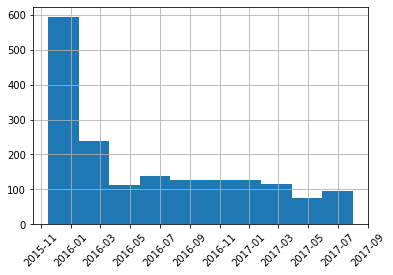

In [38]:
twitter_archive_master['timestamp'].hist();
plt.xticks(rotation=45);
plt.savefig('timestamp_histogram.png')

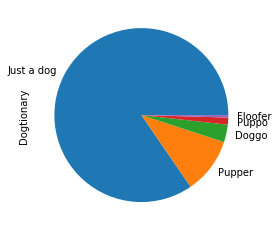

In [39]:
twitter_archive_master['Dogtionary'].value_counts().plot(kind='pie');
plt.savefig('dogpie.png')

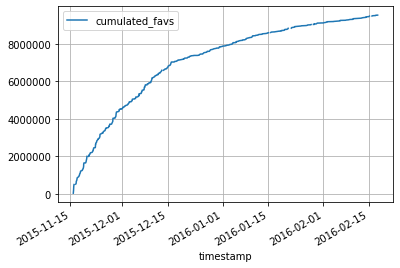

In [40]:
twitter_archive_master = twitter_archive_master.sort_values('timestamp')
twitter_archive_master['cumulated_favs'] = twitter_archive_master.favorite_count.cumsum()
twitter_archive_master.plot(x='timestamp', y='cumulated_favs');
plt.grid(True)
plt.savefig('cumulated_favs.png')

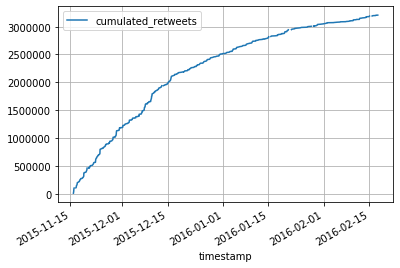

In [41]:
twitter_archive_master['cumulated_retweets'] = twitter_archive_master.retweet_count.cumsum()
twitter_archive_master.plot(x='timestamp', y='cumulated_retweets');
plt.grid(True)
plt.savefig('cumulated_retweets.png')

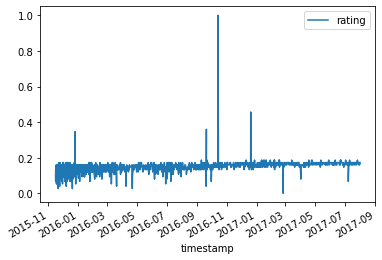

In [42]:
twitter_archive_master.plot(x='timestamp', y='rating');
plt.savefig('cutness_inflation.png')

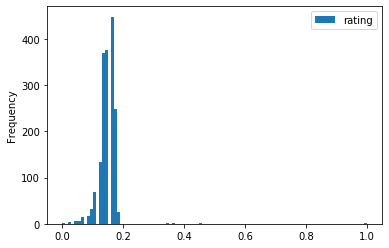

In [43]:
twitter_archive_master.plot(kind='hist', y='rating', bins=100);
plt.savefig('normalized_grades.png')

In [44]:
twitter_archive_master['rating'].describe()

count    1751.000000
mean        0.145720
std         0.033018
min         0.000000
25%         0.133000
50%         0.147000
75%         0.160000
max         1.000000
Name: rating, dtype: float64

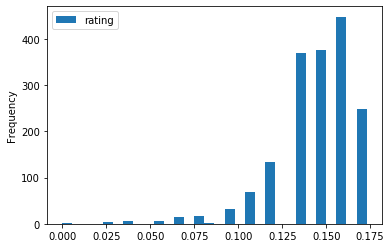

In [45]:
indexer = twitter_archive_master['rating'].between(0, twitter_archive_master['rating'].quantile(.95))
twitter_archive_master.loc[indexer, ['rating']].plot(kind='hist', y='rating', bins=30);
plt.savefig('normalized_grades_without_outliers.png')

### Analysis

* The time span o fhe tweets is roundabout two years since November 2015
* The majority of the tweets (850) occured up until January 2016 
* The tweet coverate is only available until March 2016
* Most (normalized) ratings are below 0.2, so there are some extremely high rated dogs
* The rating increases overal over the last years

### Visualization

## Report

### How many accounts does each tweet reach?

### What are the Dogtionary classifications

### What are the ratings of the Dogs?